# Todo:
- найти формулу dr/do
- рассчитать rp и ra

In [12]:
%matplotlib widget
import numpy as np
from scipy.integrate import quad,romberg
import matplotlib.pyplot as plt

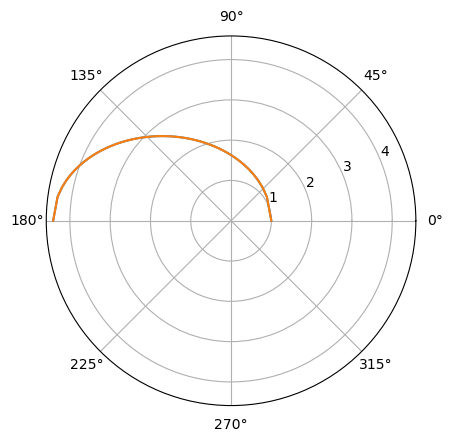

In [15]:
import numpy as np
from scipy.integrate import quad,romberg
import matplotlib.pyplot as plt

GM = 3.986004e+14
rp = 6500000
vp = 10000
# GM = 10.0
# rp = 1.0
# vp = 1.0
L = rp * vp
E0 = vp * vp / 2 - GM / rp
a = 1/(2/rp - vp*vp/GM)
e = 1 - rp/a
if e >= 1: raise Exception(e, "e >= 1")
ra = a*(1+e)

def orbit(r):
    return L / (2*E0*r**4 + 2*GM*r**3 - (L*r)**2) ** 0.5

#res = quad(orbit, rp, ra)
r = np.linspace(rp, ra, 50)
o = np.array([quad(orbit, rp, ri)[0] if ri != rp else 0 for ri in r])
plt.polar(o, r / 6500000)
plt.figure(f"Orbit, V: {vp}")
#plt.show()

In [20]:
(o * 180 / np.pi, r)
#r / 6500000

(array([  0.        , 102.11480407, 121.02819425, 130.90304966,
        137.2658869 , 141.82680321, 145.316932  , 148.10903886,
        150.416017  , 152.36957751, 154.05621759, 155.53543784,
        156.84971728, 158.03032152, 159.10085769, 160.07954186,
        160.98069654, 161.81576967, 162.59404606, 163.32315559,
        164.00944357, 164.65824563, 165.27409505, 165.86088172,
        166.4219756 , 166.96032418, 167.47853038, 167.9789159 ,
        168.46357352, 168.93441125, 169.39319038, 169.84155942,
        170.28108539, 170.71328398, 171.13965026, 171.56169165,
        171.98096563, 172.39912528, 172.81797765, 173.23956225,
        173.66626234, 174.10097033, 174.54734755, 175.01025695,
        175.49653925, 176.01654292, 176.58756258, 177.2432736 ,
        178.07092221, 180.        ]),
 array([6.50000000e+06, 1.61172378e+07, 2.57344757e+07, 3.53517135e+07,
        4.49689514e+07, 5.45861892e+07, 6.42034271e+07, 7.38206649e+07,
        8.34379028e+07, 9.30551406e+07, 1.02672378

/run/user/1000/ipykernel_178130/2795103760.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  fi_1=[1/element**2 for element in r]


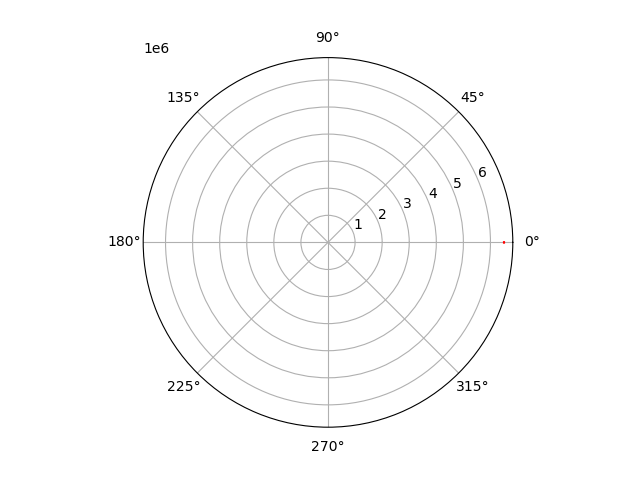

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sin, cos, linspace, pi
from scipy.integrate import odeint, solve_bvp, solve_ivp
c=300000000
M = 3.986004e+14
r0 = 6500000
v0 = 10000
fi0=0
T=100000
h=0.01
alpha=np.pi/2
L=v0*r0*np.sin(alpha)
L=(v0**2)/2-M/r0
E0 = v0**2/2 - M/r0
def F(t, r):
# print(math.sqrt(2*c+2*M/r-(L/r)**2))
# return math.sqrt(2*c+2*M/r-(L/r)**2)
    return (E0**2/c**2 - (1-2*M/r)*(1+L**2/r**2)/c**2) ** 0.5

def solve(r0, T, h):
    N_iter=int(T/h+1)
    t = np.linspace(0, T, N_iter)
    F_ = lambda xa, ya: np.asarray(F(xa, ya))
    r = [0.0]*N_iter
    r = np.array(r)
    r[0] = r0
    for n in range(1, N_iter):
        r[n]=r[n-1]+h*F_(t[n-1]+h, r[n-1]+h)
        # k1 = F_(t[n-1], r[n-1])
        # k2 = F_(t[n-1] + h/2, r[n-1] + h/2 * k1)
        # k3 = F_(t[n-1] + h, r[n-1] + h/2 * k2)
        # k4 = F_(t[n-1] + h, r[n-1] + h * k3)
        # r[n] = r[n-1] + h/6 * (k1 + 2 * k2 + 2 * k3 + k4)
        return t, r


N_iter=int(T/h+1)
fi_1=[0.0]*N_iter
fi_1=np.array(fi_1)
fi=[0.0]*N_iter
fi=np.array(fi)
fi[0]=fi0
t, r = solve(r0, T, h)
fi_1=[1/element**2 for element in r]
for i in range(1, N_iter):
    fi[i]=fi[i-1]+fi_1[i]*h

ax = plt.subplot(111,projection='polar')
ax.plot(fi, r,color='r')
ax.grid(True)
plt.show()

In [ ]:
E0 = 0
L = 0
M = 0
drdt = (E0**2 - (1 - 2*M/r)*(1 + L**2/r**2))**0.5
dodt = L/r**2

In [1]:
%matplotlib widget
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [3]:
%matplotlib widget
# G = M = c = 1
# m = 0.01 * M
# r0 = 10 * rs
# v = 0.18 # v is perpendicular to r
G = 6.67e-11
M = 2e30
c = 300000000
m = 3.33e23
r0 = 57909227000
v = 47360

rs = 2 * G * M / c**2
gamma = (1 - (v / c)**2) ** -0.5
mu = m * M / (m + M)

L = r0 * v * gamma * m
h = L / mu

# m = 0
# Erest = m * c**2
# Ekin = (gamma - 1) * m * c**2
# Epot = ((1 - rs/r)**0.5 - 1) * gamma * m * c**2
# E = Erest + Ekin + Epot
E = (1 - rs/r0)**0.5 * gamma * c**2 * m
a = h / c
b = h * m * c / E

arr = 1/np.roots([a*a*b*b*rs, -a*a*b*b, b*b*rs, a*a-b*b])
ra = arr[2].real - 10
if np.iscomplex(arr).any():
    rp = rs
else:
    arr.sort()
    rp = arr[1]
    #ra = arr[2]
print(r0, rs, arr)
# def orbit(r):
#     l = E**2/c**2 - (1 - rs/r) * (c**2 + h**2/r**2)
#     if l < 0:
#         print(l, r)
#         return
#     l = 1 / l**0.5
#     return l
def orbit(r):
    l = 1/b**2 - (1 - rs/r) * (1/a**2 + 1/r**2)
    #print(r, l, "Error!" if l <= 0 else "")
    if l <= 0:
        print(r, l, "Error!")
        return 0
        raise Exception("l<0", l)
    l = 1 / r ** 2 / l**0.5
    return l

print("Intergral:", quad(orbit, rp, r0))

# koef = 1
# r = np.linspace(ra**(1/koef), rp**(1/koef), 5000)**koef
# o = np.array([quad(orbit, ri, ra)[0] if ri != r0 else 0 for ri in r])

# # black hole
# plt.polar(np.linspace(0, 2*np.pi, 45), [rs]*45)

# def kepler_orbit():
#     L = r0 * v
#     E = v * v / 2 - G * M / r0
#     p = L * L / G / M
#     a = 1/(2/r0 - v*v/G/M)
#     e = r0/a - 1
#     o = np.linspace(0, 2*np.pi, 360)
#     plt.polar(o, p / (1 - e * np.cos(o)))

# kepler_orbit()
# plt.polar(o, r, 'black')
# plt.show()


57909227000 2964.4444444444443 [2.96444476e+03 5.49391860e+10 5.79088673e+10]
57909025462.439865 -4.417621069237666e-29 Error!
57909126231.21993 -7.415292509077511e-29 Error!
57908924270.78122 -1.735493991486226e-29 Error!
57909176615.60997 -8.67746995743113e-29 Error!
57909075635.39061 -5.837570698635487e-29 Error!
57909201807.804985 -9.308558681607939e-29 Error!
57909151317.695305 -7.888609052210118e-29 Error!
57909214403.90249 -9.781875224740546e-29 Error!
57909024426.64661 -4.417621069237666e-29 Error!
57909189158.84765 -9.150786500563737e-29 Error!
57909031312.82584 -4.5753932502818685e-29 Error!
57909220701.95125 -9.939647405784749e-29 Error!
57909125713.3233 -7.257520328033309e-29 Error!
57908909138.50711 -1.262177448353619e-29 Error!
54939189153.8986 -1.5777218104420236e-30 Error!
57909208079.42383 -9.466330862652142e-29 Error!
57909129156.41292 -7.415292509077511e-29 Error!
57908994537.42071 -3.6287601640166543e-29 Error!
57909223850.975624 -9.939647405784749e-29 Error!
579091

/run/user/1000/ipykernel_10159/2524473824.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("Intergral:", quad(orbit, rp, r0))


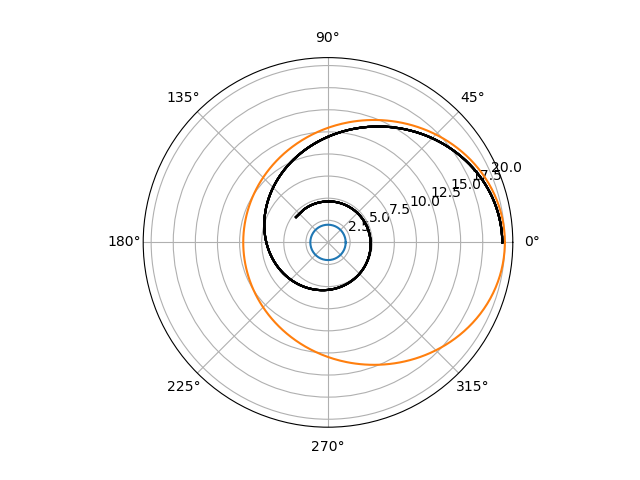

In [100]:
plt.polar(o, r, 'black')
plt.show()

# TODO
"типа посчитать" прецессию кеплера
посчитать прецессию ото и других теорий гравитации
проверить прецессию меркурия
сделать анимацию


In [11]:
%matplotlib widget
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy import constants as const
from matplotlib import animation as anim

In [41]:
# G = const.G.value
# M = const.M_sun.value
# c = const.c.value
# a = 0.387098 * const.au.value
# e = 0.205630
G = const.G.value
M = 4.4e6 * const.M_sun.value
c = const.c.value
a = 1020 * const.au.value
e = 0.88
rp = a * (1 + e)
rm = a * (1 - e)

In [12]:
def other(ax):
    # kepler
    a_kepler = (rp + rm) / 2
    e_kepler = rp / a_kepler - 1
    p_kepler = a_kepler * (1 - e_kepler**2)
    o_kepler = np.linspace(0, 2*np.pi, 360)
    r_kepler = p_kepler / (1 + e_kepler * np.cos(o_kepler))
    kepler, = ax.plot(o_kepler, r_kepler, 'green')
    # /kepler
    # black hole
    o_bh = np.linspace(0, 2*np.pi, 360)
    black_hole, = ax.plot(o_bh, [b]*360, 'black')
    # /black hole

def psi(r):
    return -(rm * rp)**2 / (r*(rp - r )*(r - rm)*((b*rm - rm*rp + b*rp)*r + b*rp*rm) )

def phi(r):
   return -b*c*c*(r - b)**2 *(rp - r )*(r - rm) *((b*rm - rm*rp + b*rp)*r + b*rp*rm)/(r**5*(rm - b)*(rp + rm)*(rp - b))

def orbit(r):
   return psi(r) ** 0.5

def orbit_time(r):
    return phi(r) ** -0.5

b = 2 * G * M / c / c
print(b, rm, rp)
angle = quad(orbit, rm, rp)
oto_precession = 2*(angle[0] - np.pi)
print(oto_precession)
time = 2*quad(orbit_time, rm, rp)[0]
print(angle, time, time/(365.25*24*3600))
precession = np.array([2*(angle[0] - np.pi), 2*angle[1]])*180/np.pi/time*365.25*24*3600*100
print(precession[0], precession[1])
print(115.88*24*3600)



12994300334.841099 18310779373680.0 286868876854320.0
0.0035607730548754546
(3.143373040117231, 9.463777317364475e-09) 490164206.50970423 15.532366419173329
1.3134976496332678 6.981994680054474e-06
10012032.0


In [13]:
angle = (c**2)*np.pi*(a**3)*((1-e**2)**0.5)*(1.10*10**-52)/G/M
lambd = (oto_precession/np.pi/c**2/a**3/(1-e**2)**0.5)*G*M
print(lambd)
precession = 2*(angle)*180/np.pi/time*365.25*24*3600*100
print(precession)

4.363862195779039e-36
6.621874613704017e-17
